# Tests for speed calculations

In [86]:
%pip install pandas numpy matplotlib seaborn nbstripout

Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Different Models

In [88]:
##### Config #####
acceleration = 2
max_speed = 100
range_array = np.arange(0, 100, 0.1)

In [89]:
def linear_acceleration(acceleration, max_speed, range_array):
    data = []
    current_speed = 0
    for i in range_array:
        current_speed = min(max_speed, current_speed + acceleration)
        data.append(current_speed)
    return data

def exponential_acceleration(acceleration, max_speed, range_array):
    data = []
    current_speed = 0
    for i in range_array:
        current_speed = min(max_speed, current_speed + acceleration * (1 - current_speed / max_speed))
        data.append(current_speed)
    return data

def slow_exp_acceleration(acceleration, max_speed, range_array):
    data = []
    current_speed = 0
    for i in range_array:
        current_speed = (i* acceleration)**2
        current_speed = min(max_speed, current_speed)
        data.append(current_speed)
    return data
        

## Visualizations of all models

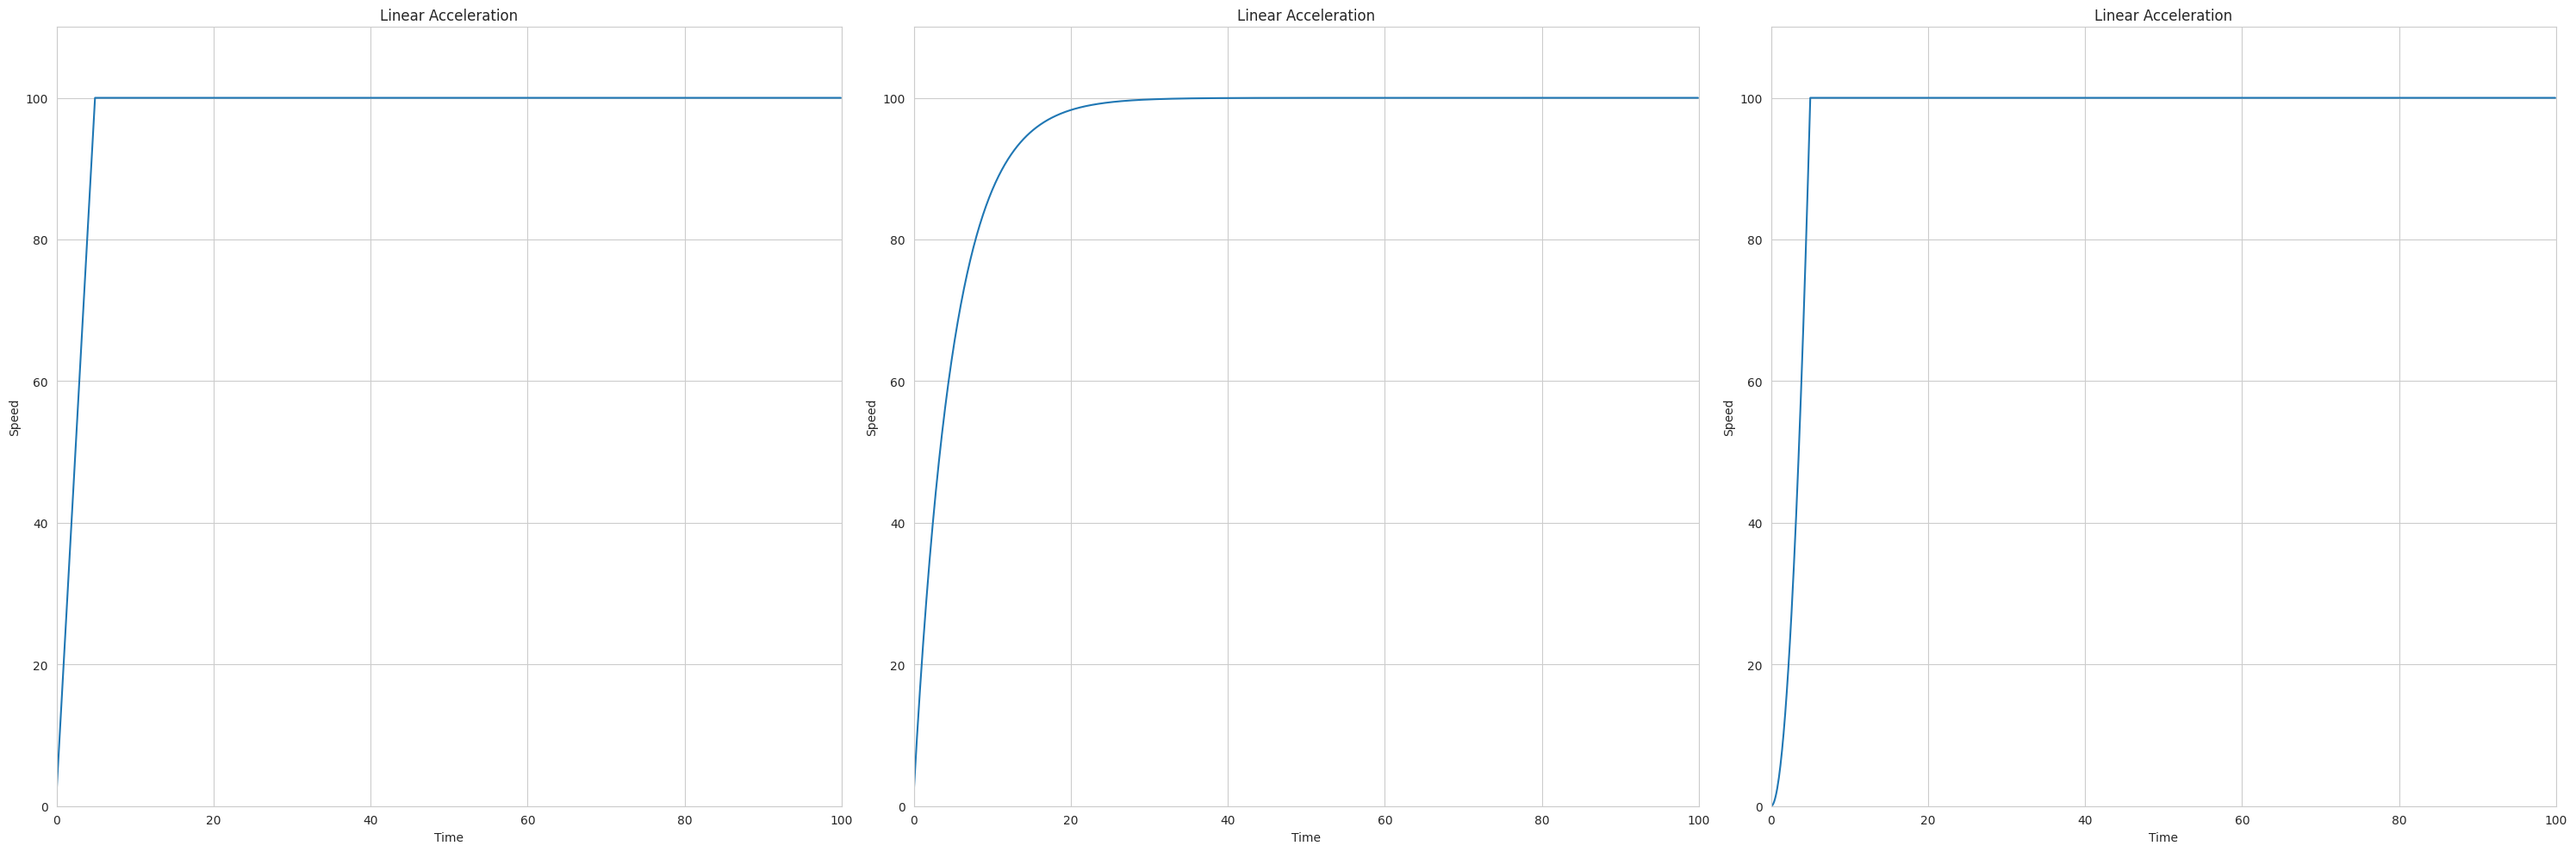

In [90]:
# Creating the figure and the axes
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

# Plotting the data
sns.lineplot(x=range_array, y=linear_acceleration(acceleration, max_speed, range_array), ax=axes[0])
sns.lineplot(x=range_array, y=exponential_acceleration(acceleration, max_speed, range_array), ax=axes[1])
sns.lineplot(x=range_array, y=slow_exp_acceleration(acceleration, max_speed, range_array), ax=axes[2])

for ax in axes:
    ax.set_title("Linear Acceleration")
    ax.set_xlabel("Time")
    ax.set_ylabel("Speed")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 110)

# Showing the plot
plt.tight_layout()
plt.show()